<br>
<br>
<center>

|Title:     | NLP Assignment 2, Question-1 |
|         :-            |                             :-:                               |
| **Resource Person:**  | Dr. Maryam Bashir                                      |
| **Course Title:**     | Natural Language Processing                                                 |
| **Credit Hours:**     | 3(3,0)                                                        |
| **Work Objective:**     | Implementation of DL models on Urdu Dataset                                                  |
<br>
            |          **Submitted By** |

|Sr. # | Name                   | Registration No. | Email Address           |
| :-   | :-                     | :-               | :-                      
| 1    | Asif Ahsan | 20L-2370         | l202370@lhr.nu.edu.pk |

<br>

## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from keras.layers import Dense, RNN, LSTM, GRU, SimpleRNN, Dropout, Bidirectional

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Reading the Dataset and view classes

In [ ]:
df = pd.read_csv("urdu-sentiment-corpus-v1.tsv", delimiter="\t", encoding="utf-8")

In [ ]:
df.Class.value_counts()

N    499
P    480
O     20
Name: Class, dtype: int64

In [ ]:
df = df[df['Class'] != 'O']

In [ ]:
df.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N


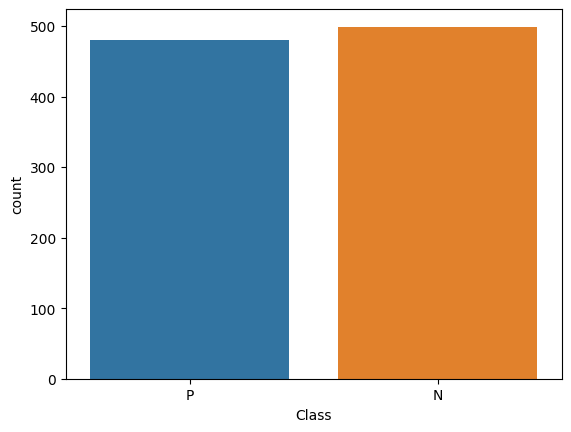

In [ ]:
sns.countplot( x = 'Class', data = df );

## Preprocessing the dataset

In [ ]:
!pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
df['Tweet_cleaned'] = df['Tweet'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_emails) # Replace all emails in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [ ]:
df.head()

,Tweet,Class,Tweet_cleaned
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N,گندی زبان اور گٹر جیسے دماغ والے جاہل جیالے ہو...


In [ ]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس میں مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split(", ") if word not in STOP_WORDS)

In [ ]:
df['Tweet_WO_stopWords'] = df['Tweet_cleaned'].apply(remove_stopwords)

In [ ]:
import re
import nltk

def word_tokenized(text):
    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
    return text

In [ ]:
df['Tweet_cleaned_tokenized'] =  df['Tweet_WO_stopWords'].apply(word_tokenized)

In [ ]:
df.head()

,Tweet,Class,Tweet_cleaned,Tweet_WO_stopWords,Tweet_cleaned_tokenized
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,"[میں, نے, ایٹم, بم, بنایا, ھے, او, بھائی, ایٹم..."
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,"[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم..."
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,"[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,..."
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,"[ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی, ہ..."
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N,گندی زبان اور گٹر جیسے دماغ والے جاہل جیالے ہو...,گندی زبان اور گٹر جیسے دماغ والے جاہل جیالے ہو...,"[گندی, زبان, اور, گٹر, جیسے, دماغ, والے, جاہل,..."


In [ ]:
print(df.Tweet_cleaned_tokenized[4])

['ابھی', 'تک', 'اسکی', 'لہریں', 'کبھی', 'کبھی', 'آ', 'جاتی', 'ہیں', 'یار', 'أ']


In [ ]:
unique_words = set(word for sublist in df['Tweet_cleaned_tokenized'] for word in sublist)
print(len(unique_words))

4603


In [ ]:
num_words = 5000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'


tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(df.Tweet_cleaned_tokenized)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
sequences = tokenizer.texts_to_sequences(df.Tweet_cleaned_tokenized)

# Get max training sequence length
seq_maxlen = max([len(x) for x in sequences])

# Pad the training sequences
seq_pad  = pad_sequences(sequences, padding=pad_type, truncating=trunc_type, maxlen=seq_maxlen)


# Output the results of our work
print("Word index:\n", word_index)
print("\nTraining sequences:\n", sequences)
print("\nPadded training sequences:\n", seq_pad )
print("\nPadded training shape:", seq_pad.shape)
print("Training sequences data type:", type(sequences))
print("Padded Training sequences data type:", type(seq_pad ))

Word index:
 {'<UNK>': 1, 'کے': 2, 'کی': 3, 'میں': 4, 'ہے': 5, 'سے': 6, 'کا': 7, 'کو': 8, 'اور': 9, 'نے': 10, 'پر': 11, 'تو': 12, 'نہیں': 13, 'ہیں': 14, 'بھی': 15, 'ہو': 16, 'کر': 17, 'اس': 18, 'کہ': 19, 'کیا': 20, 'پاکستان': 21, 'ھے': 22, 'نہ': 23, 'اللہ': 24, 'یہ': 25, 'وہ': 26, 'ہی': 27, 'خان': 28, 'ایک': 29, 'گا': 30, 'گیا': 31, 'کوئی': 32, 'آپ': 33, 'گے': 34, 'ملک': 35, 'اب': 36, 'انقلاب': 37, 'جو': 38, 'ہم': 39, 'کرنے': 40, 'ان': 41, 'اپنے': 42, 'ہوں': 43, 'عمران': 44, 'جائے': 45, 'تحریک': 46, 'عمر': 47, 'ڈیزل': 48, 'بات': 49, 'لاہور': 50, 'کچھ': 51, 'تھا': 52, 'لیے': 53, 'دیا': 54, 'گئے': 55, 'کسی': 56, 'حکومت': 57, 'آباد': 58, 'بے': 59, 'چندے': 60, 'والے': 61, 'پی': 62, 'تھے': 63, 'اسلام': 64, 'و': 65, 'ٹیسٹ': 66, 'لوگ': 67, 'بہت': 68, 'اگر': 69, 'ایم': 70, 'آج': 71, 'اے': 72, 'بن': 73, 'کام': 74, 'دل': 75, 'گی': 76, 'لئے': 77, 'جس': 78, 'اپنی': 79, 'سب': 80, 'ختم': 81, 'دو': 82, 'مجھے': 83, 'ساتھ': 84, 'بعد': 85, 'جب': 86, 'جی': 87, 'فاروق': 88, 'کریں': 89, 'دے': 90, 'نام': 91

In [ ]:
print(seq_maxlen)

35


In [ ]:
x_train , X_test = train_test_split(seq_pad, test_size=0.25, random_state=42)

In [ ]:
train_data , test_data = train_test_split(df[['Tweet_cleaned_tokenized', 'Class']], test_size=0.25, random_state=42)
print(train_data.shape,"___",test_data.shape)

(735, 2) ___ (245, 2)


In [ ]:
labels = ['P', 'N']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.Class.to_list())
y_train = encoder.transform(train_data.Class.to_list())
y_test = encoder.transform(test_data.Class.to_list())
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape, "____", y_test.shape)

(735, 1) ____ (245, 1)


# Models Building
We are now building our models after preprocessing the dataset, we will build following models given bellow:

*   RNN
*   GRU
*   LSTM
*   BiLSTM

And to build models we have to use the given configurations:


1.   2 Layers with dropout 0.3 and 0.7
2.   3 Layers with dropout 0.3 and 0.7



# RNN

## 2 layers with dropout 0.3

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences='True', input_shape=(35, 1)))
model.add(SimpleRNN(16))
model.add(Dropout(0.3))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history_RNN = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_predictionRNN = model.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionRNN]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  RNN \n')
print(class_report)
print(conf_matrix)

Epoch 1/10
12/12 [==============================] - 4s 75ms/step - loss: 0.7136 - accuracy: 0.4980 - val_loss: 0.7101 - val_accuracy: 0.4735
Epoch 2/10
12/12 [==============================] - 0s 23ms/step - loss: 0.7007 - accuracy: 0.5252 - val_loss: 0.7026 - val_accuracy: 0.5102
Epoch 3/10
12/12 [==============================] - 0s 23ms/step - loss: 0.6945 - accuracy: 0.5374 - val_loss: 0.7094 - val_accuracy: 0.4939
Epoch 4/10
12/12 [==============================] - 0s 20ms/step - loss: 0.7039 - accuracy: 0.5170 - val_loss: 0.7075 - val_accuracy: 0.5061
Epoch 5/10
12/12 [==============================] - 0s 24ms/step - loss: 0.6854 - accuracy: 0.5565 - val_loss: 0.7116 - val_accuracy: 0.4735
Epoch 6/10
12/12 [==============================] - 0s 24ms/step - loss: 0.6934 - accuracy: 0.5374 - val_loss: 0.7059 - val_accuracy: 0.4735
Epoch 7/10
12/12 [==============================] - 0s 22ms/step - loss: 0.6895 - accuracy: 0.5374 - val_loss: 0.7024 - val_accuracy: 0.4776
Epoch 8/10
12

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.49387755102040815      |	 Precision: 0.4796747967479675      |	 Recall: 0.4957983193277311     |	 F-score: 0.48760330578512395 



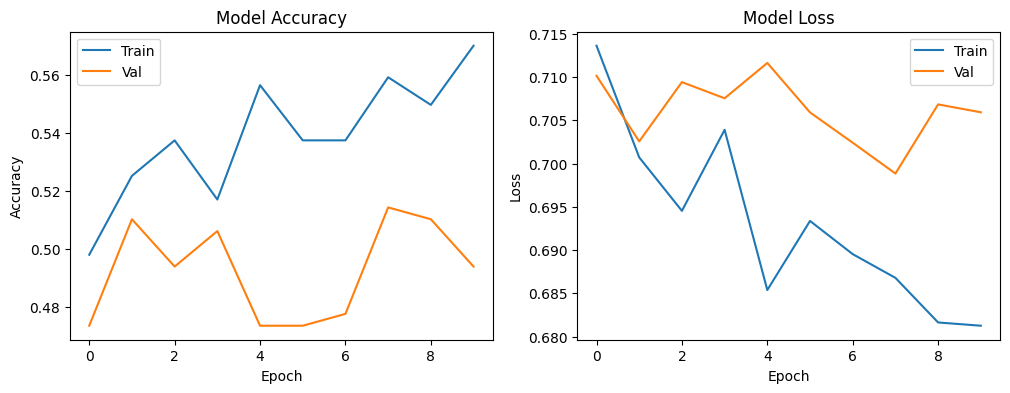

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_RNN.history['accuracy'])
axes[0].plot(history_RNN.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(history_RNN.history['loss'])
axes[1].plot(history_RNN.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

## 2 layers with dropout 0.7

In [ ]:
############################ RNN ################################
model = Sequential()
model.add(SimpleRNN(32, return_sequences='True', input_shape=(35, 1)))
model.add(SimpleRNN(16))
model.add(Dropout(0.7))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history_RNN = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_predictionRNN = model.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionRNN]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  RNN \n')
print(class_report)
print(conf_matrix)

Epoch 1/10
12/12 [==============================] - 3s 57ms/step - loss: 0.7436 - accuracy: 0.5143 - val_loss: 0.7313 - val_accuracy: 0.4857
Epoch 2/10
12/12 [==============================] - 0s 19ms/step - loss: 0.7387 - accuracy: 0.5143 - val_loss: 0.7166 - val_accuracy: 0.4939
Epoch 3/10
12/12 [==============================] - 0s 20ms/step - loss: 0.7543 - accuracy: 0.4925 - val_loss: 0.7074 - val_accuracy: 0.4694
Epoch 4/10
12/12 [==============================] - 0s 19ms/step - loss: 0.7325 - accuracy: 0.4925 - val_loss: 0.7066 - val_accuracy: 0.4612
Epoch 5/10
12/12 [==============================] - 0s 21ms/step - loss: 0.7193 - accuracy: 0.5347 - val_loss: 0.7090 - val_accuracy: 0.4816
Epoch 6/10
12/12 [==============================] - 0s 20ms/step - loss: 0.7028 - accuracy: 0.5456 - val_loss: 0.7140 - val_accuracy: 0.4857
Epoch 7/10
12/12 [==============================] - 0s 24ms/step - loss: 0.7074 - accuracy: 0.5170 - val_loss: 0.7034 - val_accuracy: 0.4531
Epoch 8/10
12

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5020408163265306      |	 Precision: 0.4878048780487805      |	 Recall: 0.5042016806722689     |	 F-score: 0.49586776859504134 



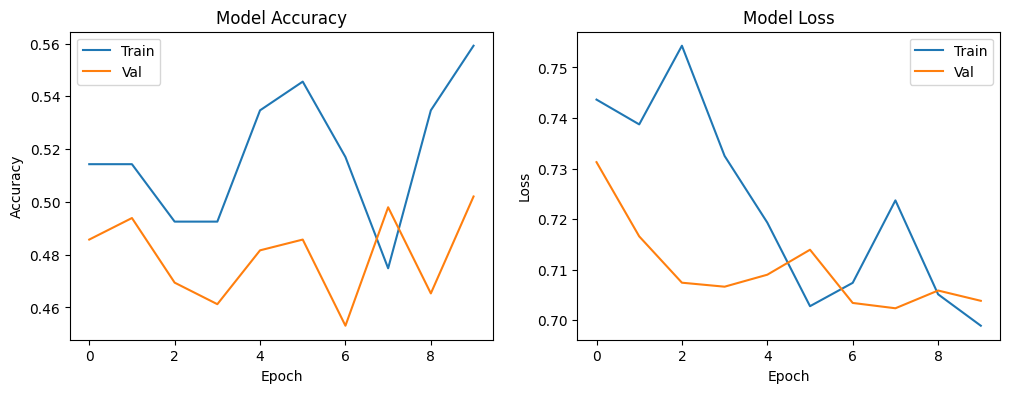

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_RNN.history['accuracy'])
axes[0].plot(history_RNN.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(history_RNN.history['loss'])
axes[1].plot(history_RNN.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

## 3 layers with dropout 0.3

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences='True', input_shape=(35, 1)))
model.add(SimpleRNN(32, return_sequences='True'))
model.add(SimpleRNN(16))
model.add(Dropout(0.3))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history_RNN = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_predictionRNN = model.predict( X_test )

y_prediction = [0 if val < 0.5 else 1 for val in test_predictionRNN]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  RNN \n')
print(class_report)
print(conf_matrix)

Epoch 1/10
12/12 [==============================] - 5s 73ms/step - loss: 0.7830 - accuracy: 0.4898 - val_loss: 0.7085 - val_accuracy: 0.5265
Epoch 2/10
12/12 [==============================] - 0s 34ms/step - loss: 0.7178 - accuracy: 0.5347 - val_loss: 0.7132 - val_accuracy: 0.5020
Epoch 3/10
12/12 [==============================] - 0s 30ms/step - loss: 0.7017 - accuracy: 0.5456 - val_loss: 0.7072 - val_accuracy: 0.5184
Epoch 4/10
12/12 [==============================] - 0s 33ms/step - loss: 0.7093 - accuracy: 0.5306 - val_loss: 0.7109 - val_accuracy: 0.5061
Epoch 5/10
12/12 [==============================] - 0s 30ms/step - loss: 0.6958 - accuracy: 0.5510 - val_loss: 0.7056 - val_accuracy: 0.5429
Epoch 6/10
12/12 [==============================] - 0s 29ms/step - loss: 0.6836 - accuracy: 0.5660 - val_loss: 0.7117 - val_accuracy: 0.5061
Epoch 7/10
12/12 [==============================] - 0s 32ms/step - loss: 0.6927 - accuracy: 0.5565 - val_loss: 0.7137 - val_accuracy: 0.4816
Epoch 8/10
12

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5102040816326531      |	 Precision: 0.4954128440366973      |	 Recall: 0.453781512605042     |	 F-score: 0.47368421052631576 



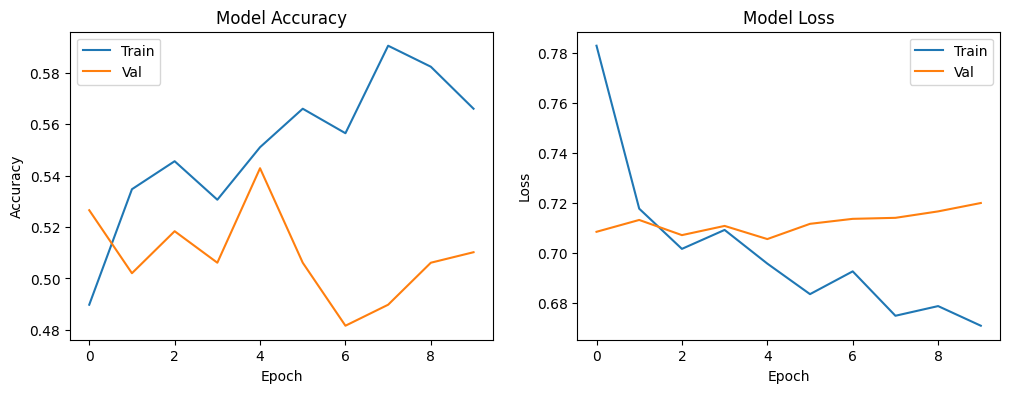

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_RNN.history['accuracy'])
axes[0].plot(history_RNN.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(history_RNN.history['loss'])
axes[1].plot(history_RNN.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

## 3 layers with dropout 0.7

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, return_sequences='True', input_shape=(35, 1)))
model.add(SimpleRNN(32, return_sequences='True'))
model.add(SimpleRNN(16))
model.add(Dropout(0.7))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history_RNN = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_predictionRNN = model.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionRNN]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  RNN \n')
print(class_report)
print(conf_matrix)

Epoch 1/10
12/12 [==============================] - 4s 83ms/step - loss: 0.8230 - accuracy: 0.5265 - val_loss: 0.7162 - val_accuracy: 0.5102
Epoch 2/10
12/12 [==============================] - 1s 53ms/step - loss: 0.8183 - accuracy: 0.4966 - val_loss: 0.7142 - val_accuracy: 0.5347
Epoch 3/10
12/12 [==============================] - 1s 51ms/step - loss: 0.7981 - accuracy: 0.5088 - val_loss: 0.7174 - val_accuracy: 0.4776
Epoch 4/10
12/12 [==============================] - 1s 53ms/step - loss: 0.7875 - accuracy: 0.4898 - val_loss: 0.7037 - val_accuracy: 0.5184
Epoch 5/10
12/12 [==============================] - 1s 55ms/step - loss: 0.7862 - accuracy: 0.4980 - val_loss: 0.7046 - val_accuracy: 0.4776
Epoch 6/10
12/12 [==============================] - 1s 54ms/step - loss: 0.7616 - accuracy: 0.5102 - val_loss: 0.7114 - val_accuracy: 0.4980
Epoch 7/10
12/12 [==============================] - 1s 51ms/step - loss: 0.7397 - accuracy: 0.5361 - val_loss: 0.6984 - val_accuracy: 0.5061
Epoch 8/10
12

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5551020408163265      |	 Precision: 0.5342465753424658      |	 Recall: 0.6554621848739496     |	 F-score: 0.5886792452830188 



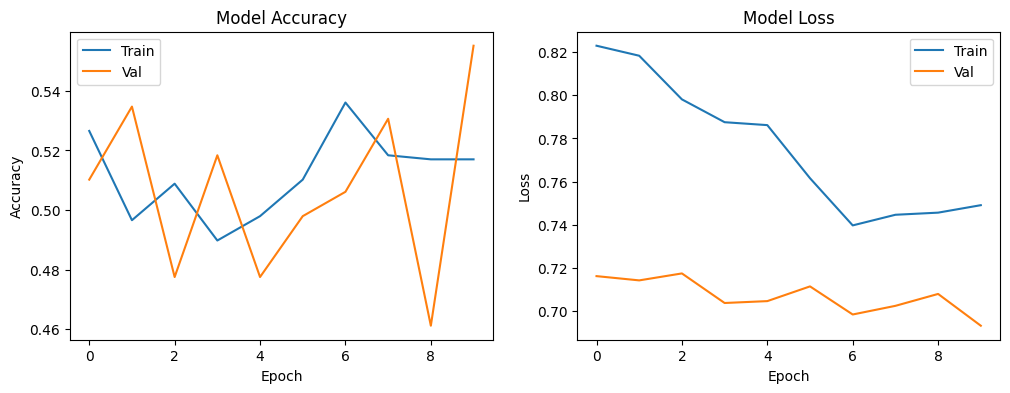

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_RNN.history['accuracy'])
axes[0].plot(history_RNN.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(history_RNN.history['loss'])
axes[1].plot(history_RNN.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

# GRU

## 2 layers with dropout 0.3

In [ ]:
modelgru = tf.keras.Sequential([
    tf.keras.layers.GRU(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.GRU(16, dropout=0.3, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelgru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelgru.summary()

history_gru = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictiongru = model.predict(X_test)

y_prediction = [0 if val < 0.5 else 1 for val in test_predictiongru]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  GRU \n')
print(class_report)
print(conf_matrix)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 35, 32)            3360      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,777
Trainable params: 5,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 0s 36ms/step - loss: 0.6938 - accuracy: 0.5456 - val_loss: 0.7017 - val_accuracy: 0.4857
Epoch 2/5
12/12 [===========================

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5387755102040817      |	 Precision: 0.5306122448979592      |	 Recall: 0.4369747899159664     |	 F-score: 0.47926267281105994 



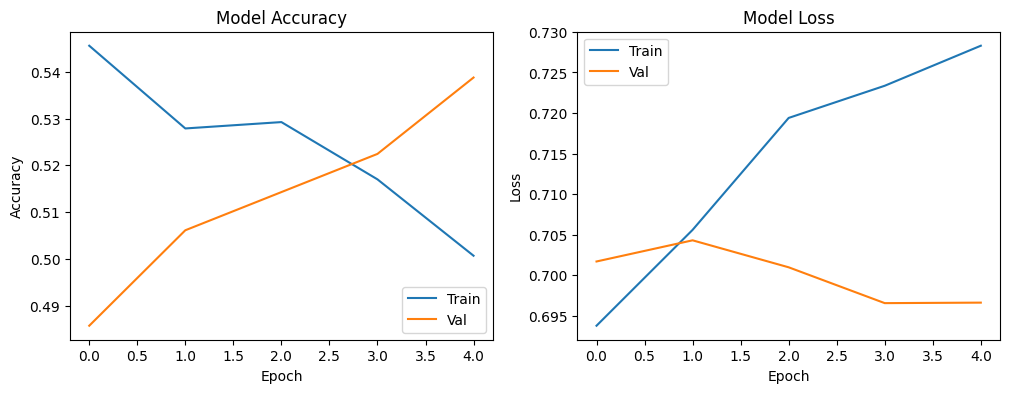

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_gru.history['accuracy'])
axes[0].plot(history_gru.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(history_gru.history['loss'])
axes[1].plot(history_gru.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

## 2 layers with dropout 0.7

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.GRU(16, dropout=0.7, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
modelgru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelgru.summary()

history_gru = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictiongru = model.predict(X_test)

y_prediction = [0 if val < 0.5 else 1 for val in test_predictiongru]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  GRU \n')
print(class_report)
print(conf_matrix)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 35, 32)            3360      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,777
Trainable params: 5,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 1s 80ms/step - loss: 0.7012 - accuracy: 0.5293 - val_loss: 0.6975 - val_accuracy: 0.5388
Epoch 2/5
12/12 [===========================

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.4857142857142857      |	 Precision: 0.45977011494252873      |	 Recall: 0.33613445378151263     |	 F-score: 0.38834951456310685 



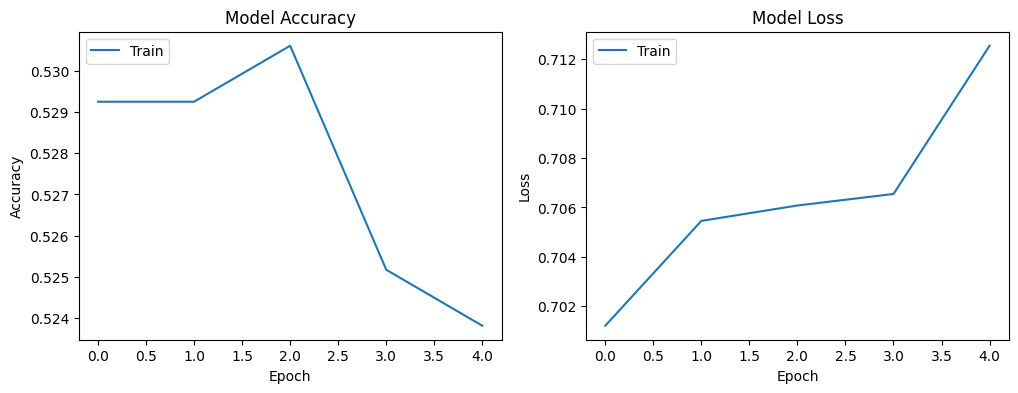

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_gru.history['accuracy'])
# axes[0].plot(history_gru.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_gru.history['loss'])
# axes[1].plot(history_gru.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.3

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.GRU(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True,),
    tf.keras.layers.GRU(16, dropout=0.3, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
modelgru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelgru.summary()

history_gru = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictiongru = model.predict(X_test)

y_prediction = [0 if val < 0.5 else 1 for val in test_predictiongru]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  GRU \n')
print(class_report)
print(conf_matrix)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 35, 32)            3360      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,777
Trainable params: 5,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 0s 33ms/step - loss: 0.7025 - accuracy: 0.5320 - val_loss: 0.7044 - val_accuracy: 0.4776
Epoch 2/5
12/12 [===========================

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5061224489795918      |	 Precision: 0.4930555555555556      |	 Recall: 0.5966386554621849     |	 F-score: 0.5399239543726236 



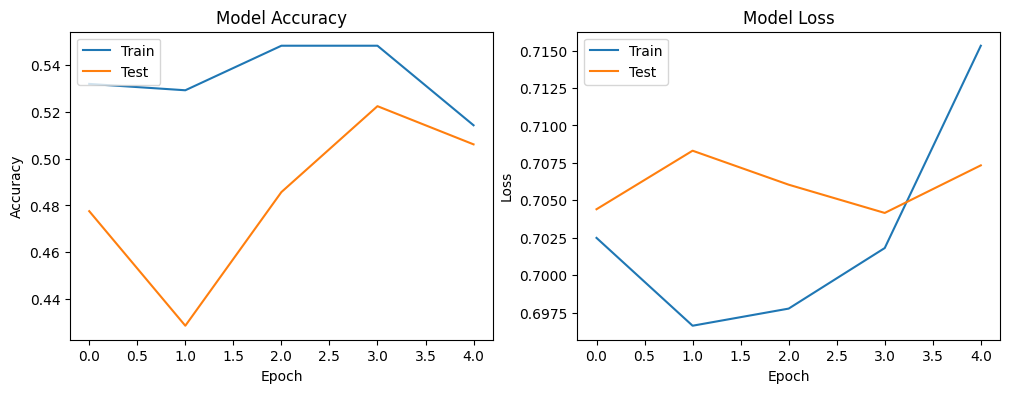

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_gru.history['accuracy'])
axes[0].plot(history_gru.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_gru.history['loss'])
axes[1].plot(history_gru.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.7

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.GRU(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True,),
    tf.keras.layers.GRU(16, dropout=0.7, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
modelgru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelgru.summary()

history_gru = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictiongru = model.predict(X_test)

y_prediction = [0 if val < 0.5 else 1 for val in test_predictiongru]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  GRU \n')
print(class_report)
print(conf_matrix)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 35, 32)            3360      
                                                                 
 gru_7 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,777
Trainable params: 5,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 0s 34ms/step - loss: 0.7092 - accuracy: 0.5088 - val_loss: 0.7069 - val_accuracy: 0.4612
Epoch 2/5
12/12 [===========================

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5265306122448979      |	 Precision: 0.5135135135135135      |	 Recall: 0.4789915966386555     |	 F-score: 0.4956521739130435 



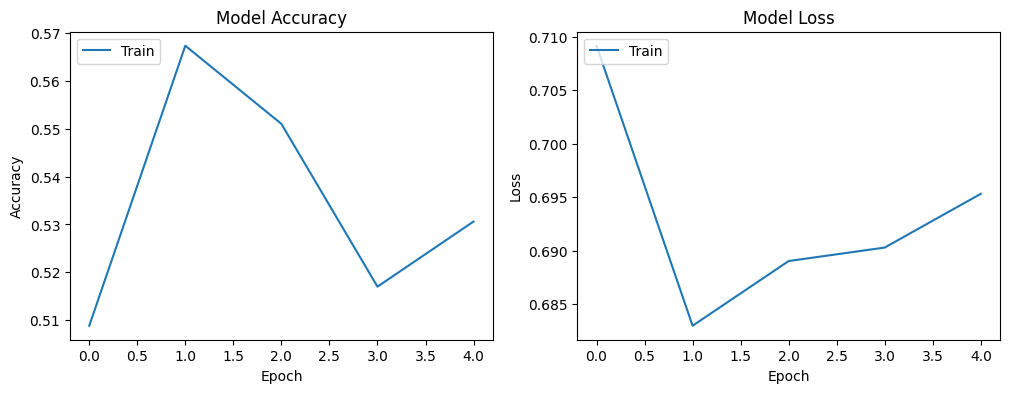

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_gru.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_gru.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

# LSTM

## 2 layers with dropout 0.3

In [ ]:
##################################### LSTM ###############################################3
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.LSTM(16, dropout=0.3, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionlstm = model.predict( X_test )

y_prediction = [0 if val < 0.5 else 1 for val in test_predictionlstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  LSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 35, 16)            3136      
                                                                 
 dropout_13 (Dropout)        (None, 35, 16)            0         
                                                                 
 dense_13 (Dense)            (None, 35, 1)             17        
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 8s 139ms/step - loss: 0.6995 - accuracy: 0.4937 - val_loss: 0.6964 - val_accuracy: 0.4997
Epoch 2/5
12/12 [=========================

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5265306122448979      |	 Precision: 0.5135135135135135      |	 Recall: 0.4789915966386555     |	 F-score: 0.4956521739130435 



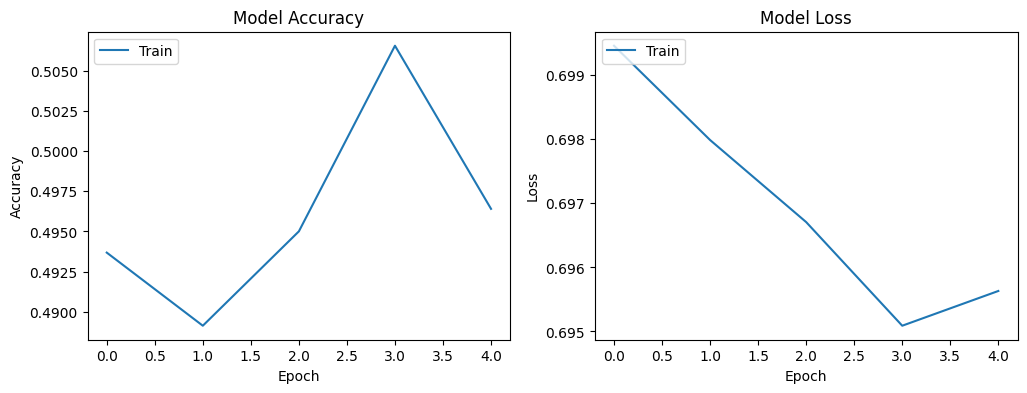

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_lstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_lstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 2 layers with dropout 0.7

In [ ]:
##################################### LSTM ###############################################3
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.LSTM(16, dropout=0.7, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionlstm = model.predict( X_test )

y_prediction = [0 if val < 0.5 else 1 for val in test_predictionlstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  LSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 35, 32)            4352      
                                                                 
 lstm_3 (LSTM)               (None, 35, 16)            3136      
                                                                 
 dropout_14 (Dropout)        (None, 35, 16)            0         
                                                                 
 dense_14 (Dense)            (None, 35, 1)             17        
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] - 11s 258ms/step - loss: 0.7007 - accuracy: 0.4993 - val_loss: 0.6935 - val_accuracy: 0.5263
Epoch 2/5
12/12 [========================

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5265306122448979      |	 Precision: 0.5135135135135135      |	 Recall: 0.4789915966386555     |	 F-score: 0.4956521739130435 



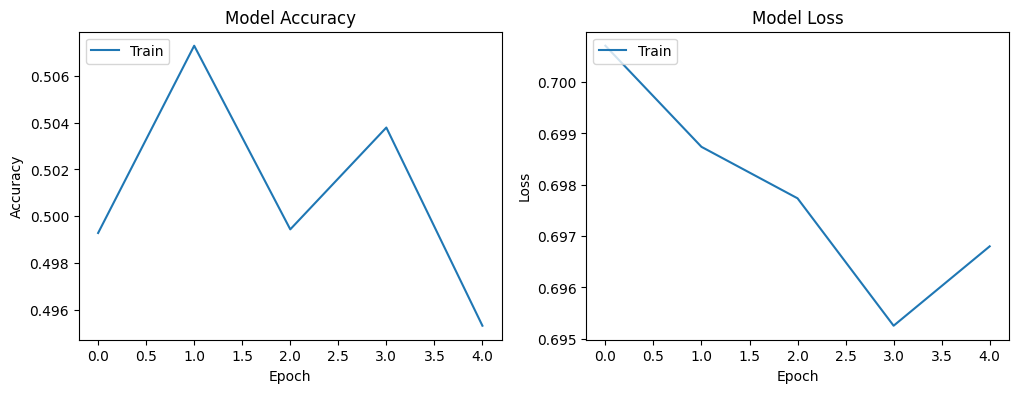

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_lstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_lstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.3

In [ ]:
##################################### LSTM ###############################################3
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(16, dropout=0.3, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionlstm = model.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionlstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  LSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 35, 32)            4352      
                                                                 
 lstm_5 (LSTM)               (None, 35, 32)            8320      
                                                                 
 lstm_6 (LSTM)               (None, 35, 16)            3136      
                                                                 
 dropout_15 (Dropout)        (None, 35, 16)            0         
                                                                 
 dense_15 (Dense)            (None, 35, 1)             17        
                                                                 
Total params: 15,825
Trainable params: 15,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] 

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5265306122448979      |	 Precision: 0.5135135135135135      |	 Recall: 0.4789915966386555     |	 F-score: 0.4956521739130435 



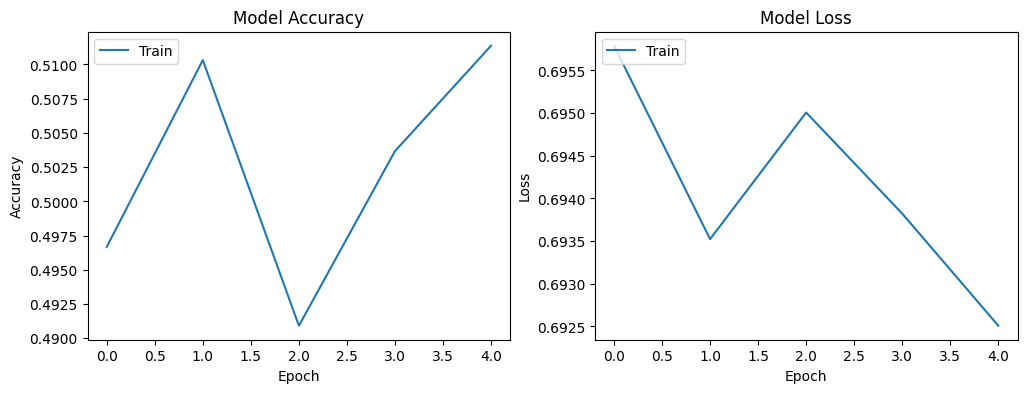

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_lstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_lstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.7

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True, input_shape=(35,1)),
    tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(16, dropout=0.7, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionlstm = model.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionlstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  LSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 35, 32)            4352      
                                                                 
 lstm_8 (LSTM)               (None, 35, 32)            8320      
                                                                 
 lstm_9 (LSTM)               (None, 35, 16)            3136      
                                                                 
 dropout_16 (Dropout)        (None, 35, 16)            0         
                                                                 
 dense_16 (Dense)            (None, 35, 1)             17        
                                                                 
Total params: 15,825
Trainable params: 15,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] 

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5265306122448979      |	 Precision: 0.5135135135135135      |	 Recall: 0.4789915966386555     |	 F-score: 0.4956521739130435 



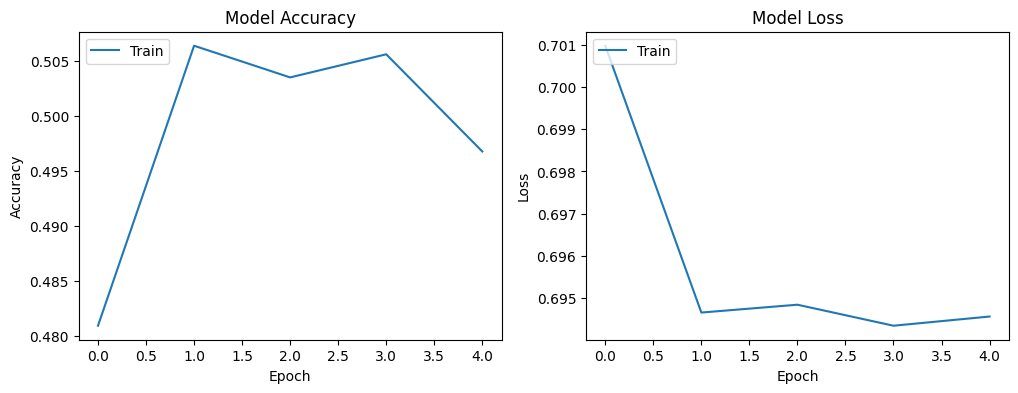

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_lstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_lstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

# BiLSTM

## 2 layers with dropout 0.3

In [ ]:
max_len = 35
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True),input_shape=(max_len, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.3, recurrent_dropout=0.2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionbilstm = model_bilstm.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionbilstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  BILSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 35, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,105
Trainable params: 19,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] 

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5020408163265306      |	 Precision: 0.4930875576036866      |	 Recall: 0.8991596638655462     |	 F-score: 0.6369047619047619 



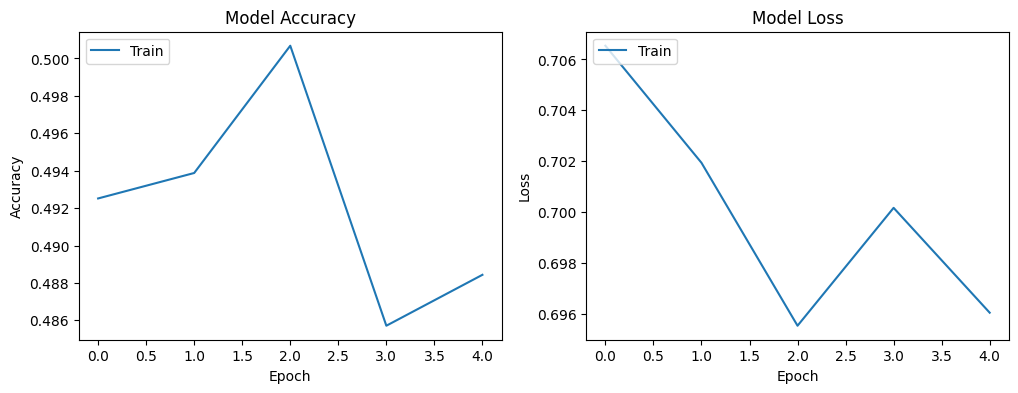

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_bilstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_bilstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 2 layers with dropout 0.7

In [ ]:
max_len = 35
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True),input_shape=(max_len, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.7, recurrent_dropout=0.2)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionbilstm = model_bilstm.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionbilstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  BILSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 35, 64)           8704      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,105
Trainable params: 19,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
12/12 [==============================] 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.4857142857142857      |	 Precision: 0.4857142857142857      |	 Recall: 1.0     |	 F-score: 0.6538461538461539 



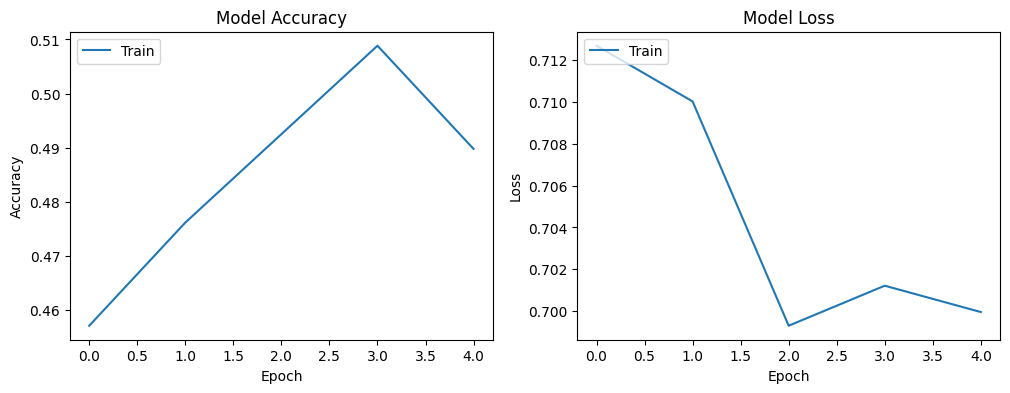

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_bilstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_bilstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.3

In [ ]:
max_len = 35
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True),input_shape=(max_len, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.3, recurrent_dropout=0.2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionbilstm = model_bilstm.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionbilstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  BILSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 35, 64)           8704      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 35, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                     

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5102040816326531      |	 Precision: 0.4975124378109453      |	 Recall: 0.8403361344537815     |	 F-score: 0.625 



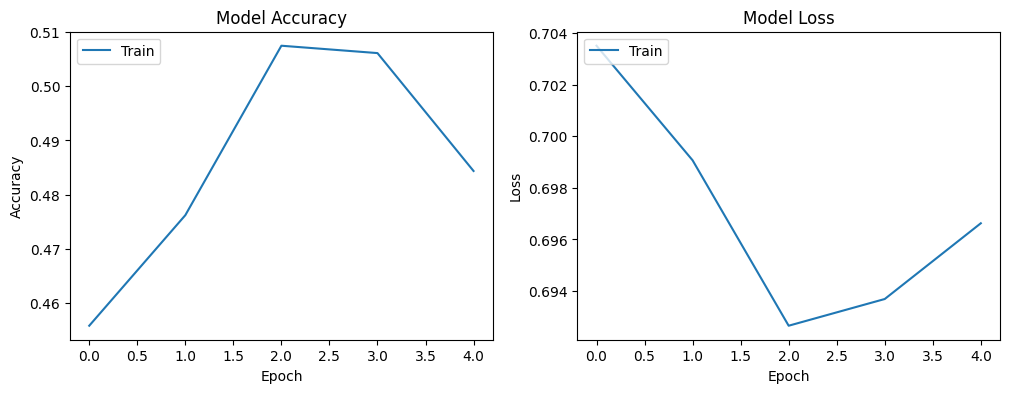

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_bilstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_bilstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

## 3 layers with dropout 0.7

In [ ]:
max_len = 35
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True),input_shape=(max_len, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, dropout=0.7, recurrent_dropout=0.2)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

test_predictionbilstm = model_bilstm.predict( X_test )
y_prediction = [0 if val < 0.5 else 1 for val in test_predictionbilstm]

class_report = classification_report(y_prediction, y_test)
conf_matrix = confusion_matrix(y_prediction , y_test)

print('Results of  BILSTM \n')
print(class_report)
print(conf_matrix)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 35, 64)           8704      
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 35, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                     

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_prediction)
# Calculate precision
precision = precision_score(y_test, y_prediction)
# Calculate recall
recall = recall_score(y_test, y_prediction)
# Calculate F-score
f_score = f1_score(y_test, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.46530612244897956      |	 Precision: 0.4647058823529412      |	 Recall: 0.6638655462184874     |	 F-score: 0.5467128027681661 



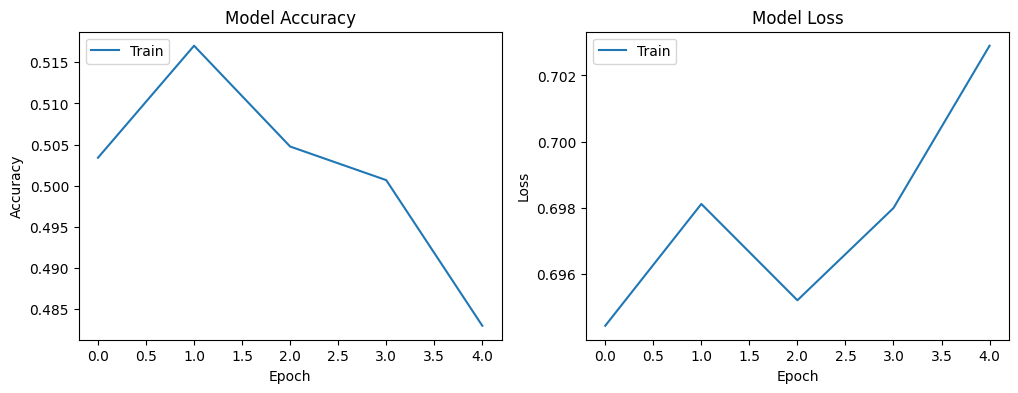

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first graph on the left axis
axes[0].plot(history_bilstm.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the right axis
axes[1].plot(history_bilstm.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()